findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

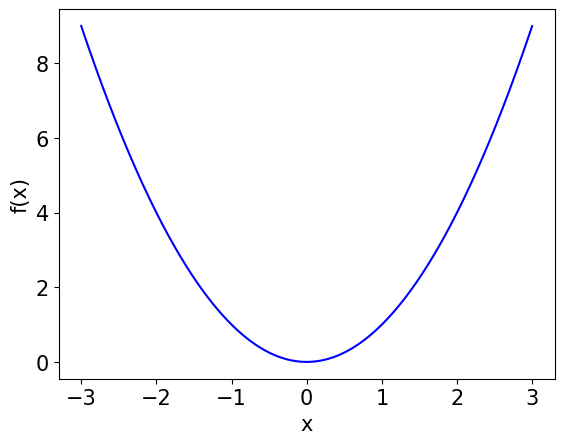

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3.0, 3.0, 0.001)
fn = lambda x: [x_ ** 2 for x_ in x] if type(x) == list else x ** 2
grad_fn = lambda x: [x_ * 2 for x_ in x] if type(x) == list else x * 2

plt.plot(x, fn(x), 'b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig("x2.jpg", dpi=300)
plt.show()

In [65]:
def compute_solution(fn, grad_fn, x_init, alpha, num_iters=100, eps=1e-6):
    x_iters = [x_init]
    cur_x = x_init
    for iteration in range(num_iters):
        # Gradient Descent
        next_x = cur_x - alpha * grad_fn(cur_x)
        x_iters.append(next_x)
        if abs(grad_fn(next_x)) < eps:
            return x_iters
        
        cur_x = next_x
    
    return x_iters

In [42]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

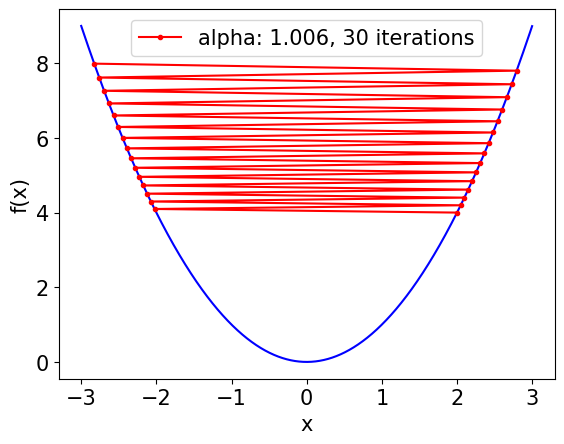

In [64]:
alphas = [0.01 / 4, 0.1 / 4, 1 / 4, 3.95 / 4, 4.024 / 4]
x_init = 2.0
num_iters = [2000, 1000, 1000, 29, 29]

plt.plot(x, fn(x), 'b')
ep_len = []

for idx, alpha in enumerate(alphas):
    if idx != 4:
        continue
    x_iters = compute_solution(fn, grad_fn, x_init, alpha, num_iters[idx])
    plt.plot(x_iters, fn(x_iters), 'r.-', label=f'alpha: {alpha}, {len(x_iters)} iterations')
    ep_len.append(len(x_iters))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('div_alpha.jpg', dpi=300)
plt.show()

In [65]:
ep_len

[1840, 227, 22, 55, 21]

In [57]:
def backtracking_armijo(x, pk, fn, grad_fn, gamma=0.5, beta=0.8, tmax=1):
    t = tmax
    while fn(x + t * pk) >= fn(x) + gamma * t * grad_fn(x) * pk:
        # Update t using beta
        t = beta * t
    return t

def compute_armijo_solution(fn, grad_fn, x_init, num_iters=100, eps=1e-6, gamma=0.5, beta=0.8):
    x_iters = [x_init]
    cur_x = x_init
    for iteration in range(num_iters):
        # tk, pk
        pk = -grad_fn(cur_x)
        tk = backtracking_armijo(cur_x, pk, fn, grad_fn, gamma=gamma, beta=beta)
        
        # Compute next_x value
        next_x = cur_x + tk * pk
        x_iters.append(next_x)
        
        # Check convergence
        if abs(grad_fn(next_x)) < eps:
            return x_iters
        
        # Update current value of x
        cur_x = next_x
    
    return x_iters        

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

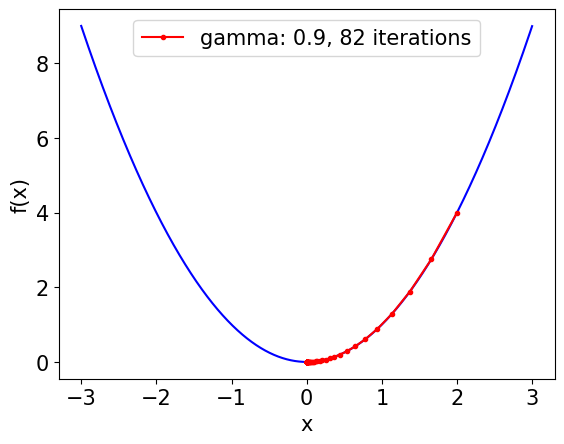

In [59]:
x_init = 2.0
gammas = [0.1, 0.5, 0.9]

plt.plot(x, fn(x), 'b')
ep_len = []

for idx, gamma in enumerate(gammas):
    if idx != 2:
        continue
    x_iters = compute_armijo_solution(fn, grad_fn, x_init, gamma=gamma)
    plt.plot(x_iters, fn(x_iters), 'r.-', label=f'gamma: {gamma}, {len(x_iters)} iterations')
    ep_len.append(len(x_iters))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('gamma_1.jpg', dpi=300)
plt.show()

In [74]:
ep_len

[32, 14, 11, 21, 70]